In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

from bezierv.classes.bezierv import Bezierv
from bezierv.algorithms.non_linear_solver import NonLinearSolver
from bezierv.algorithms.proj_grad import ProjGrad

In [3]:
np.random.seed(123)

In [9]:
def run_benchmark_distributions(n, x_sample):

    # Projected Gradient
    controls_z0 = np.linspace(0, 1, n + 1)
    bezierv_proj = Bezierv(n)
    proj_grad = ProjGrad(bezierv_proj, x_sample)
    start_time = time.time()
    bezierv_proj_fitted = proj_grad.fit(controls_z0, step=0.01)
    elapsed_proj = time.time() - start_time
    mse_proj = proj_grad.mse

    # Non-Linear Solver
    controls_z0 = np.linspace(0, 1, n + 1)
    bezierv_nonl = Bezierv(n)
    non_linear_solver = NonLinearSolver(bezierv_nonl, x_sample)
    start_time = time.time()
    bezierv_nonl_fitted = non_linear_solver.fit()
    elapsed_nonl = time.time() - start_time
    mse_nonl = non_linear_solver.mse
    print("---------------------------------------------")
    print("Projected Gradient")
    print("Elapsed time: ", elapsed_proj)
    print("MSE: ", mse_proj)
    print("Non-Linear Solver")
    print("Elapsed time: ", elapsed_nonl)
    print("MSE: ", mse_nonl)

    return elapsed_proj, mse_proj, bezierv_proj_fitted, elapsed_nonl, mse_nonl, bezierv_nonl_fitted

In [6]:
x_sample = np.sort(np.random.uniform(0, 1, 100))
n = 1
elapsed_proj, mse_proj, bezierv_proj_fitted, elapsed_nonl, mse_nonl, bezierv_nonl_fitted = run_benchmark_distributions(n, x_sample)

Converged in 0 iterations
---------------------------------------------
Projected Gradient
Elapsed time:  0.006936073303222656
MSE:  0.0009558161586329639
Non-Linear Solver
Elapsed time:  1.1887931823730469
MSE:  0.000955816158632964


ValueError: f(a) and f(b) must have different signs

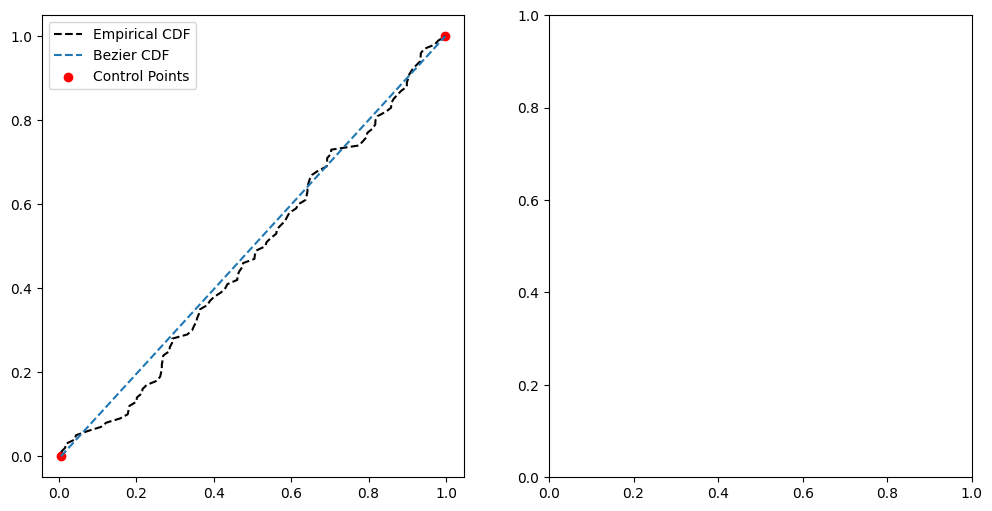

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

bezierv_proj_fitted.plot_cdf(x_sample, ax=ax1)

# Plot the second function in the second subplot (ax2)
# Replace this with your second plot function (e.g., plot_cdf2)
bezierv_nonl_fitted.plot_cdf(x_sample, ax=ax2)

# Add a title to the subplots
ax1.set_title('Projected Gradient')
ax2.set_title('Non-Linear Solver')

# Show the plot
plt.tight_layout()
plt.show()

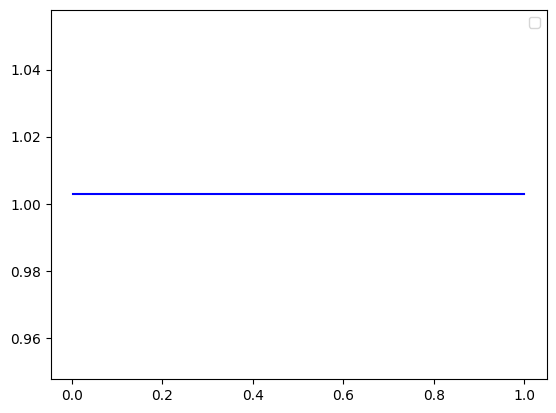

In [ ]:
bezierv_proj_fitted.plot_pdf()

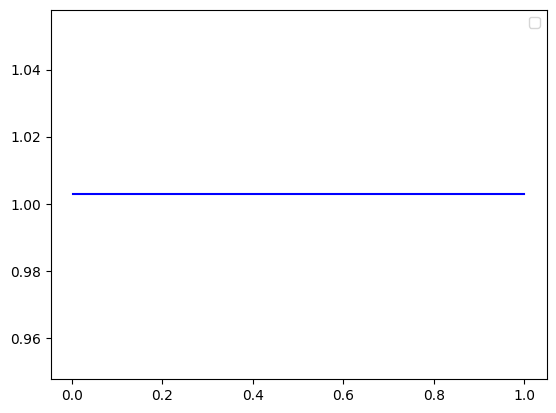

In [ ]:
bezierv_nonl_fitted.plot_pdf()

In [10]:
#bimodal distribution
x_sample = np.sort(np.concatenate([np.random.normal(1, 1, 50), np.random.normal(5, 1, 50)]))
n = 5
elapsed_proj, mse_proj, bezierv_proj_fitted, elapsed_nonl, mse_nonl, bezierv_nonl_fitted = run_benchmark_distributions(n, x_sample)

Converged in 209 iterations
---------------------------------------------
Projected Gradient
Elapsed time:  0.3201637268066406
MSE:  0.0013405391706559514
Non-Linear Solver
Elapsed time:  0.5895860195159912
MSE:  0.0010265600055125443


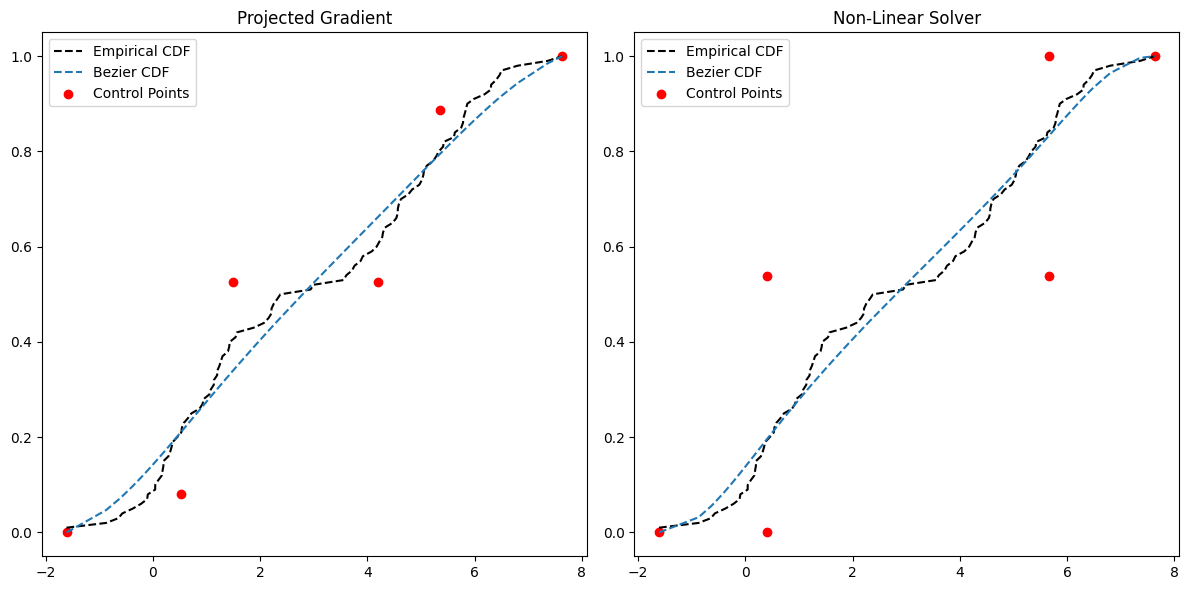

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

bezierv_proj_fitted.plot_cdf(x_sample, ax=ax1)

# Plot the second function in the second subplot (ax2)
# Replace this with your second plot function (e.g., plot_cdf2)
bezierv_nonl_fitted.plot_cdf(x_sample, ax=ax2)

# Add a title to the subplots
ax1.set_title('Projected Gradient')
ax2.set_title('Non-Linear Solver')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Primer Semestre - MIND\Research\bezierv\bezierv\classes\bezierv.py:487: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


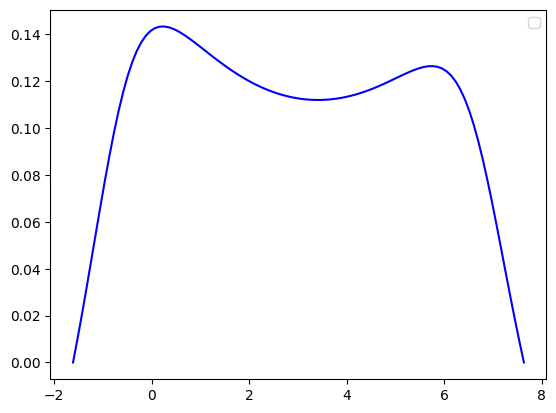

In [12]:
bezierv_nonl_fitted.plot_pdf()

(array([0.02048792, 0.        , 0.        , 0.02048792, 0.04097583,
        0.05121979, 0.05121979, 0.10243958, 0.11268354, 0.12804947,
        0.1690253 , 0.21512312, 0.18439124, 0.12804947, 0.20487916,
        0.18439124, 0.1946352 , 0.15365937, 0.11780552, 0.10243958,
        0.12292749, 0.12804947, 0.04097583, 0.05121979, 0.04097583,
        0.08707364, 0.04609781, 0.08707364, 0.0973176 , 0.13829343,
        0.0973176 , 0.14853739, 0.17926926, 0.18439124, 0.1946352 ,
        0.23048905, 0.18951322, 0.12292749, 0.1690253 , 0.11780552,
        0.11780552, 0.12292749, 0.07682968, 0.04609781, 0.03585385,
        0.01024396, 0.03585385, 0.01024396, 0.00512198, 0.00512198]),
 array([-1.74965523e+00, -1.55441819e+00, -1.35918116e+00, -1.16394412e+00,
        -9.68707078e-01, -7.73470039e-01, -5.78233000e-01, -3.82995962e-01,
        -1.87758923e-01,  7.47811590e-03,  2.02715155e-01,  3.97952193e-01,
         5.93189232e-01,  7.88426271e-01,  9.83663310e-01,  1.17890035e+00,
         1.374

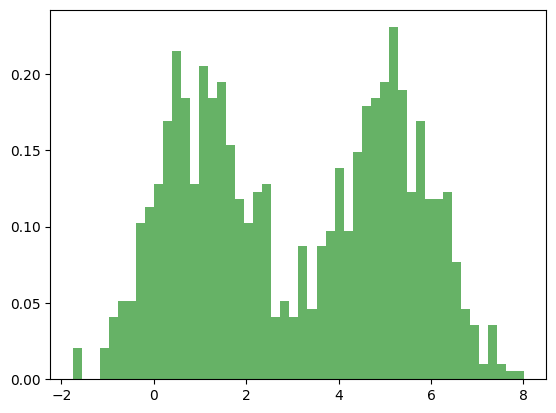

In [ ]:
# plot histogram x
plt.hist(x, bins=50, density=True, alpha=0.6, color='g')